In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("E:/ml/IRIS.csv")
x=data.iloc[:, :-1].values
y=data.iloc[:, -1].values

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=0)

In [6]:
print(y_test)

[0 2 0 1 2 2 0 2 1 2 1 2 2 0 0 0 0 0 1 0 1 1 0 2 1]


In [7]:
from sklearn.svm import SVC
classifier=SVC(kernel='poly',random_state=0)
classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [8]:
y_pred=classifier.predict(x_test)

In [9]:
print(y_pred)

[0 2 0 1 2 1 0 2 2 2 1 1 2 0 0 0 0 0 1 0 1 1 0 2 1]


In [10]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)
print(cm)

[[10  0  0]
 [ 0  6  2]
 [ 0  1  6]]


In [11]:
import seaborn as sns

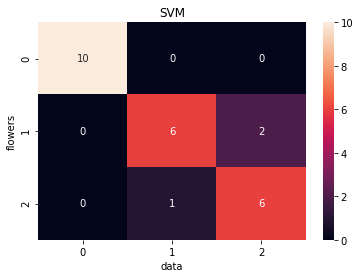

In [12]:
axis=plt.subplot()
sns.heatmap(cm,ax=axis,annot=True)
axis.set_xlabel('data')
axis.set_ylabel('flowers')
axis.set_title('SVM')
plt.show()

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)*100

88.0

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(x_train)
pca_2d = pca.transform(x_train)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


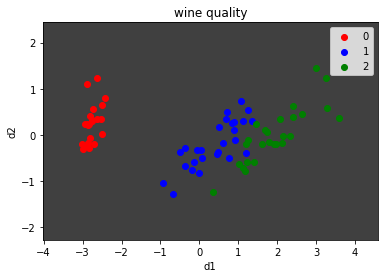

In [17]:
from matplotlib.colors import ListedColormap
x1,x2=np.meshgrid(np.arange(start=pca_2d[:,0].min()-1,stop=pca_2d[:,0].max()+1,step=0.01),
                 np.arange(start=pca_2d[:,1].min()-1,stop=pca_2d[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]+ [np.repeat(0, x1.ravel().size) for _ in range(2)]).T)
             .reshape(x1.shape),alpha=0.75,cmap=ListedColormap(('black')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_train)):
    plt.scatter(pca_2d[y_train==j,0],pca_2d[y_train==j,1],
               c=ListedColormap(('red','blue','green')) (i),label=j)
plt.legend()
plt.title('wine quality')
plt.xlabel('d1')
plt.ylabel('d2')
plt.show()